In [198]:
# Import packages
# Decision Tree Regression
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [199]:
#%cd "C:\Users\p0909013\Desktop\QSAR\Nadia\QSAR-master\QSAR-master"
%cd "C:\Users\p0909013\Desktop\projets\QSAR\Laura\data"

C:\Users\p0909013\Desktop\projets\QSAR\Laura\data


In [200]:
%pwd
%ls 

 Le volume dans le lecteur C n’a pas de nom.
 Le numéro de série du volume est 282E-20EE

 Répertoire de C:\Users\p0909013\Desktop\projets\QSAR\Laura\data

2021-03-01  16:39    <DIR>          .
2021-03-01  16:39    <DIR>          ..
2020-03-05  11:30    <DIR>          .ipynb_checkpoints
2019-10-17  16:48         2 078 706 Clear Database_Laura_v2-2 - Copie.xlsx
2020-03-19  14:30           169 417 Clear Database_Laura_v2-2.csv
2019-10-17  15:08         1 893 860 Clear Database_Laura_v2-2.xlsx
2019-10-17  19:07         3 857 553 Clear Database_Laura_v2-3.xlsx
2019-10-17  15:56         1 893 860 Clear Database_Laura_v2-4.xlsx
2019-10-17  16:42         1 893 860 Clear Database_Laura_v2-5.xlsx
2019-10-17  17:17         3 264 388 Clear Database_Laura_v2-9.xlsx
2019-10-16  21:43         1 398 436 Database_Laura.xlsx
2019-10-17  19:07         2 126 477 Database_Laura_v2.xlsx
2020-03-26  13:47           301 910 DATA-MOE-SelectionDescriptors.xlsx
2020-03-26  16:12           285 940 DATA-MOE-Selec

In [201]:
# Read data set 
# The last column nee to be a target Y
filename_data_train = 'trainset_115_after_feature_selection.csv'
filename_data_test = 'testset_115_after_feature_selection.csv'

dataframe_data_train = read_csv(filename_data_train,sep=';')
dataframe_data_test = read_csv(filename_data_test,sep=';')

In [202]:
dataframe_data_train

,SMILES,Ratio Ln,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_aro,a_count,...,vsurf_W1,vsurf_W2,vsurf_W3,vsurf_W4,vsurf_W5,vsurf_Wp1,vsurf_Wp3,Weight,weinerPol,zagreb
0,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...,-2.41,42.919998,541.88379,38.976181,499.52170,541.88379,0.000000,12,22,...,1174.375,514.750,111.625,3.875,0.000,996.125,59.500,498.66199,46,118
1,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,1.39,41.283001,643.68921,21.282999,622.40619,0.00000,643.689210,0,43,...,1549.750,1183.500,855.500,344.875,90.500,872.500,0.250,713.09796,114,246
2,O=C1NC(=O)C2C1CC=CC2,-0.09,22.785137,316.60257,193.087360,123.51521,153.43596,163.166630,0,20,...,750.500,447.375,222.000,93.750,42.375,486.625,47.000,151.16499,15,58
3,S=P(OCC)(OCC)Oc1nc(C(C)C)nc(C)c1,-0.16,46.258652,547.79272,356.764860,191.02785,387.65170,160.141010,6,40,...,874.875,327.750,104.875,24.250,10.500,778.625,35.750,304.35098,26,90
4,S(=O)(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,-1.05,23.107000,410.35071,10.079229,400.27145,0.00000,410.350710,0,23,...,1077.875,887.000,629.625,304.000,130.375,605.375,0.000,399.10300,54,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],-0.25,37.002380,502.35733,74.775352,427.29446,472.55930,29.798048,12,22,...,1108.125,549.000,206.000,60.875,20.000,886.250,51.125,375.87299,34,100
80,Clc1c(Cl)c(Cl)cc(c1Cl)-c1c(Cl)cc(Cl)c(Cl)c1,-1.71,38.380379,510.91016,81.089241,429.25940,510.91016,0.000000,12,22,...,1078.500,434.250,86.375,0.000,0.000,908.875,55.500,395.32700,34,100
81,ClC(Cl)(Cl)C(c1ccc(Cl)cc1)c1ccc(Cl)cc1,-0.94,41.541138,508.82898,134.081920,374.74707,367.26343,141.565570,12,28,...,1017.750,394.250,57.000,0.125,0.000,876.500,34.750,354.49100,28,98
82,Cc1c2c(ccc1)cccc2,0.26,26.027929,343.39206,175.527020,156.79381,343.39206,0.000000,10,21,...,582.375,165.625,13.750,0.000,0.000,534.375,2.750,142.20100,15,56


In [203]:
dataframe_data_train = dataframe_data_train.drop(['SMILES'], axis=1)
dataframe_data_test = dataframe_data_test.drop(['SMILES'], axis=1)

In [204]:
dataframe_data_train

,Ratio Ln,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_aro,a_count,a_donacc,...,vsurf_W1,vsurf_W2,vsurf_W3,vsurf_W4,vsurf_W5,vsurf_Wp1,vsurf_Wp3,Weight,weinerPol,zagreb
0,-2.41,42.919998,541.88379,38.976181,499.52170,541.88379,0.000000,12,22,0,...,1174.375,514.750,111.625,3.875,0.000,996.125,59.500,498.66199,46,118
1,1.39,41.283001,643.68921,21.282999,622.40619,0.00000,643.689210,0,43,0,...,1549.750,1183.500,855.500,344.875,90.500,872.500,0.250,713.09796,114,246
2,-0.09,22.785137,316.60257,193.087360,123.51521,153.43596,163.166630,0,20,3,...,750.500,447.375,222.000,93.750,42.375,486.625,47.000,151.16499,15,58
3,-0.16,46.258652,547.79272,356.764860,191.02785,387.65170,160.141010,6,40,4,...,874.875,327.750,104.875,24.250,10.500,778.625,35.750,304.35098,26,90
4,-1.05,23.107000,410.35071,10.079229,400.27145,0.00000,410.350710,0,23,0,...,1077.875,887.000,629.625,304.000,130.375,605.375,0.000,399.10300,54,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-0.25,37.002380,502.35733,74.775352,427.29446,472.55930,29.798048,12,22,0,...,1108.125,549.000,206.000,60.875,20.000,886.250,51.125,375.87299,34,100
80,-1.71,38.380379,510.91016,81.089241,429.25940,510.91016,0.000000,12,22,0,...,1078.500,434.250,86.375,0.000,0.000,908.875,55.500,395.32700,34,100
81,-0.94,41.541138,508.82898,134.081920,374.74707,367.26343,141.565570,12,28,0,...,1017.750,394.250,57.000,0.125,0.000,876.500,34.750,354.49100,28,98
82,0.26,26.027929,343.39206,175.527020,156.79381,343.39206,0.000000,10,21,0,...,582.375,165.625,13.750,0.000,0.000,534.375,2.750,142.20100,15,56


In [205]:
y_train = dataframe_data_train['Ratio Ln']
y_test = dataframe_data_test['Ratio Ln']

In [206]:
X_train = dataframe_data_train.drop(['Ratio Ln'], axis=1)
X_test = dataframe_data_test.drop(['Ratio Ln'], axis=1)

In [207]:
X_train

,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_aro,a_count,a_donacc,a_heavy,...,vsurf_W1,vsurf_W2,vsurf_W3,vsurf_W4,vsurf_W5,vsurf_Wp1,vsurf_Wp3,Weight,weinerPol,zagreb
0,42.919998,541.88379,38.976181,499.52170,541.88379,0.000000,12,22,0,22,...,1174.375,514.750,111.625,3.875,0.000,996.125,59.500,498.66199,46,118
1,41.283001,643.68921,21.282999,622.40619,0.00000,643.689210,0,43,0,43,...,1549.750,1183.500,855.500,344.875,90.500,872.500,0.250,713.09796,114,246
2,22.785137,316.60257,193.087360,123.51521,153.43596,163.166630,0,20,3,11,...,750.500,447.375,222.000,93.750,42.375,486.625,47.000,151.16499,15,58
3,46.258652,547.79272,356.764860,191.02785,387.65170,160.141010,6,40,4,19,...,874.875,327.750,104.875,24.250,10.500,778.625,35.750,304.35098,26,90
4,23.107000,410.35071,10.079229,400.27145,0.00000,410.350710,0,23,0,23,...,1077.875,887.000,629.625,304.000,130.375,605.375,0.000,399.10300,54,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,37.002380,502.35733,74.775352,427.29446,472.55930,29.798048,12,22,0,19,...,1108.125,549.000,206.000,60.875,20.000,886.250,51.125,375.87299,34,100
80,38.380379,510.91016,81.089241,429.25940,510.91016,0.000000,12,22,0,19,...,1078.500,434.250,86.375,0.000,0.000,908.875,55.500,395.32700,34,100
81,41.541138,508.82898,134.081920,374.74707,367.26343,141.565570,12,28,0,19,...,1017.750,394.250,57.000,0.125,0.000,876.500,34.750,354.49100,28,98
82,26.027929,343.39206,175.527020,156.79381,343.39206,0.000000,10,21,0,11,...,582.375,165.625,13.750,0.000,0.000,534.375,2.750,142.20100,15,56


In [208]:
y_train

0    -2.41
1     1.39
2    -0.09
3    -0.16
4    -1.05
      ... 
79   -0.25
80   -1.71
81   -0.94
82    0.26
83   -1.51
Name: Ratio Ln, Length: 84, dtype: float64

In [209]:
X_test

,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_aro,a_count,a_donacc,a_heavy,...,vsurf_W1,vsurf_W2,vsurf_W3,vsurf_W4,vsurf_W5,vsurf_Wp1,vsurf_Wp3,Weight,weinerPol,zagreb
0,39.681515,442.24814,200.437810,209.94800,442.24814,0.000000,18,30,0,18,...,852.750,305.625,44.125,0.000,0.000,773.500,21.750,228.29399,31,102
1,42.889172,595.07001,66.461929,528.60809,595.07001,0.000000,12,23,0,19,...,1261.375,535.500,140.250,8.875,0.250,1076.250,88.250,643.58698,30,98
2,37.669170,504.68204,104.282660,400.11185,468.65015,36.031876,12,23,2,19,...,1095.250,520.625,182.125,43.875,15.375,893.250,67.625,376.88098,34,100
3,35.353966,473.92636,104.284790,368.25577,473.92636,0.000000,12,22,0,17,...,994.250,380.625,68.500,0.000,0.000,842.375,44.250,326.43698,27,88
4,35.353966,476.31808,115.047930,359.88968,476.31808,0.000000,12,22,0,17,...,982.500,386.000,61.875,0.000,0.000,838.625,41.375,326.43698,28,88
5,36.867172,495.35977,100.461170,393.51044,495.35977,0.000000,12,22,0,18,...,1041.000,414.625,78.625,0.000,0.000,886.500,50.000,360.88199,31,94
6,38.380379,511.26691,87.832047,422.87335,511.26691,0.000000,12,22,0,19,...,1068.625,437.125,82.750,0.000,0.000,906.000,53.750,395.32700,35,100
7,36.867172,491.68390,98.659012,392.46930,491.68390,0.000000,12,22,0,18,...,1043.250,415.000,77.000,0.000,0.000,883.375,53.000,360.88199,31,94
8,36.867172,497.27301,90.308319,405.57889,497.27301,0.000000,12,22,0,18,...,1048.250,409.625,84.000,0.000,0.000,894.625,54.000,360.88199,30,94
9,36.867172,492.54907,95.268173,396.99338,492.54907,0.000000,12,22,0,18,...,1017.000,401.625,71.000,0.000,0.000,862.625,41.875,360.88199,31,94


In [210]:
y_test

0    -1.05
1    -1.61
2    -0.39
3    -2.12
4    -1.83
5    -1.83
6    -1.83
7    -1.71
8    -1.71
9    -1.56
10   -1.51
11   -1.47
12   -1.39
13   -1.31
14   -1.31
15   -1.20
16   -1.20
17   -1.02
18   -0.87
19   -0.84
20    0.03
Name: Ratio Ln, dtype: float64

Ridge Regression

TRAIN
	R2 train: 0.88
	RMSE train: 0.29

CROSS-VALIDATION
	Q2 cross-validation: 0.98
	RMSE cross-validation: 0.13

TEST
	R2 test: 0.56
	RMSE test: 0.33


<Figure size 1080x936 with 0 Axes>

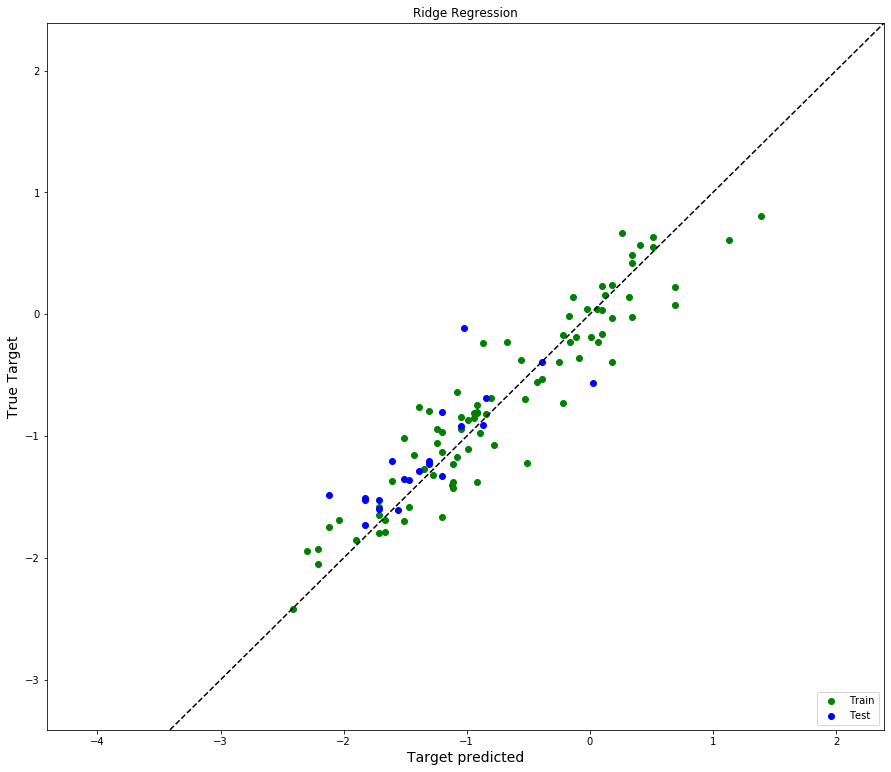

In [189]:
# Ridge Regression
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from random import randint

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import RidgeCV

from math import sqrt

# Create linear regression object
ridge = KernelRidge(alpha=200.0)

models_acronyme = [ridge]
models_name = ["Ridge Regression"]

fig = plt.figure(figsize=(15, 13))
x_fig = 1
y_fig = 1
nb_fig = x_fig * y_fig
    
fig = plt.figure(figsize=(15, 13))

i = 0
for index_model in models_acronyme:
    # Train the model using the training sets
    result_train = index_model.fit(X_train, y_train)
    y_pred_train = index_model.predict(X_train)
    
    # Print outputs
    print(models_name[i])
    print('\nTRAIN')
    print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
    rmse = sqrt(mean_squared_error(y_train, y_pred_train))
    print('\tRMSE train: %.2f' % rmse)
    
    print('\nCROSS-VALIDATION')
    clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
    print('\tQ2 cross-validation: %.2f' % clf.score(X_train, y_train))
    kfold = KFold(n_splits=5)
    y_pred_cv = clf.predict(X_train)
    rmse = sqrt(mean_squared_error(y_train, y_pred_cv))
    print('\tRMSE cross-validation: %.2f' % rmse)
    
    # Make predictions using the testing set
    #result_train = index_model.fit(X_train, y_train_)
    y_pred_test = index_model.predict(X_test)

    # Print outputs scores
    # Explained variance score: 1 is perfect prediction
    print('\nTEST')
    # R2 score
    print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
    rmse = sqrt(mean_squared_error(y_test, y_pred_test))
    print('\tRMSE test: %.2f' % rmse)
    
    # Plot outputs
    ax = fig.add_subplot(x_fig,y_fig,i+1)
    ax.scatter(y_train, y_pred_train, c='green', label='Train')
    ax.scatter(y_test, y_pred_test,c='blue',label='Test')
    ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
    plt.xlim((min(y_train)-2,max(y_train)+1))
    plt.ylim((min(y_train)-1,max(y_train)+1))
    plt.title(models_name[i])
    plt.legend(loc='lower right')

    ax.set_ylabel("True Target",fontsize=14)
    ax.set_xlabel("Target predicted",fontsize=14)
        
    i = i + 1

plt.savefig('results_1_1_before_RR.png')
plt.show()

Lasso Regression

TRAIN
	R2 train: 0.87
	RMSE train: 0.30

CROSS-VALIDATION
	Q2 cross-validation: 0.67
	RMSE cross-validation: 0.48

TEST
	R2 test: 0.55
	RMSE test: 0.34


<Figure size 1080x936 with 0 Axes>

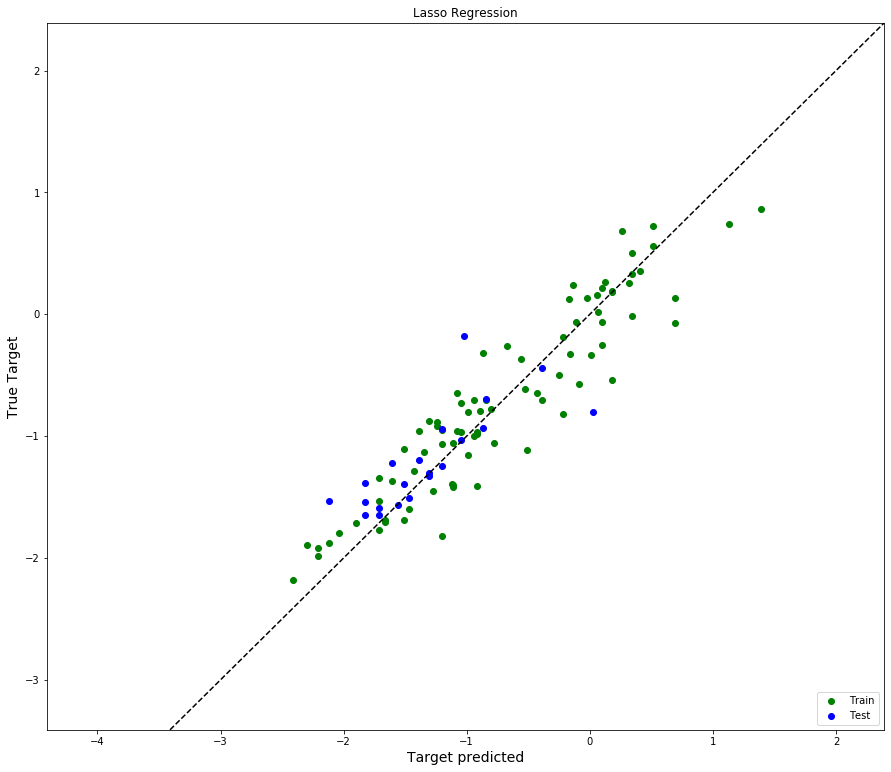

In [190]:
# Lasso Regression
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from random import randint

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LassoCV

import warnings

warnings.filterwarnings('ignore')


# Create linear regression object
lasso = Lasso(alpha=0.05)

models_acronyme = [lasso]
models_name = ["Lasso Regression"]

fig = plt.figure(figsize=(15, 13))
x_fig = 1
y_fig = 1
nb_fig = x_fig * y_fig
    
fig = plt.figure(figsize=(15, 13))

i = 0
for index_model in models_acronyme:
    # Train the model using the training sets
    result_train = index_model.fit(X_train, y_train)
    y_pred_train = index_model.predict(X_train)
    
    # Print outputs
    print(models_name[i])
    print('\nTRAIN')
    print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
    rmse = sqrt(mean_squared_error(y_train, y_pred_train))
    print('\tRMSE train: %.2f' % rmse)
    
    print('\nCROSS-VALIDATION')
    clf = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
    print('\tQ2 cross-validation: %.2f' % clf.score(X_train, y_train))
    y_pred_cv = clf.predict(X_train)
    rmse = sqrt(mean_squared_error(y_train, y_pred_cv))
    print('\tRMSE cross-validation: %.2f' % rmse)
    
    # Make predictions using the testing set
    y_pred_test = index_model.predict(X_test)

    # Print outputs scores
    # Explained variance score: 1 is perfect prediction
    print('\nTEST')
    # R2 score
    print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
    rmse = sqrt(mean_squared_error(y_test, y_pred_test))
    print('\tRMSE test: %.2f' % rmse)
    
    # Plot outputs
    ax = fig.add_subplot(x_fig,y_fig,i+1)
    ax.scatter(y_train, y_pred_train, c='green', label='Train')
    ax.scatter(y_test, y_pred_test,c='blue',label='Test')
    ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
    plt.xlim((min(y_train)-2,max(y_train)+1))
    plt.ylim((min(y_train)-1,max(y_train)+1))
    plt.title(models_name[i])
    plt.legend(loc='lower right')

    ax.set_ylabel("True Target",fontsize=14)
    ax.set_xlabel("Target predicted",fontsize=14)
        
    i = i + 1

plt.savefig('results_1_1_before_LR.png')
plt.show()

Elastic Net

TRAIN
	R2 train: 0.84
	RMSE train: 0.34

CROSS-VALIDATION
	Q2 cross-validation: 0.67
	RMSE cross-validation: 0.48

TEST
	R2 test: 0.61
	RMSE test: 0.31


<Figure size 1080x792 with 0 Axes>

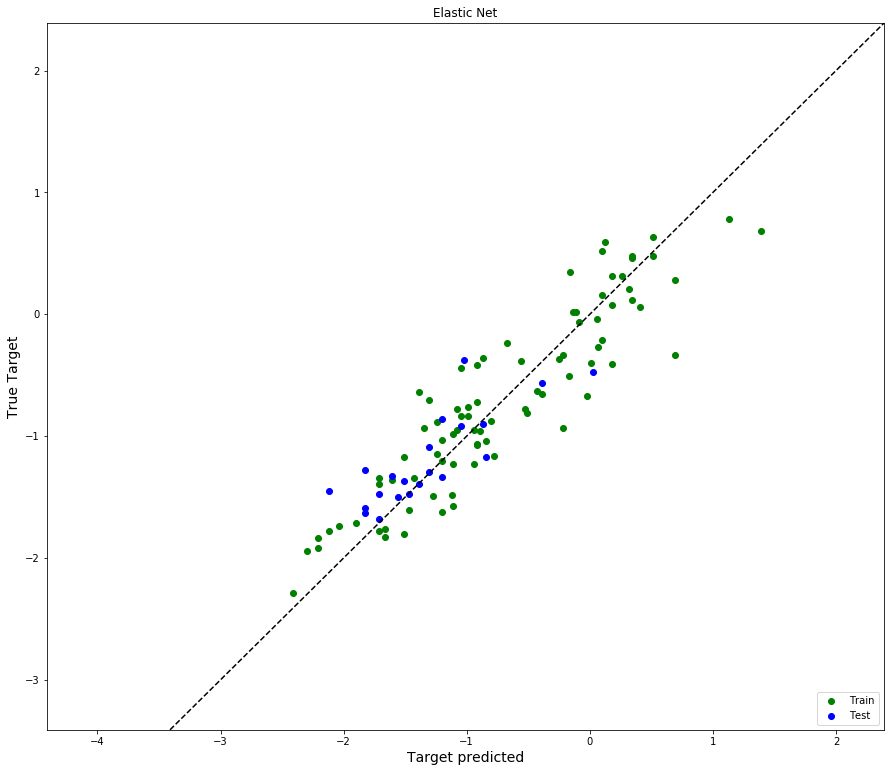

In [191]:
# Elastic Net
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from random import randint

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import ElasticNetCV


# Create elastic net object
en = ElasticNet(alpha=0.00000001, random_state=0, positive=True)

models_acronyme = [en]
models_name = ["Elastic Net"]

fig = plt.figure(figsize=(15, 11))
x_fig = 1
y_fig = 1
nb_fig = x_fig * y_fig
    
fig = plt.figure(figsize=(15, 13))

i = 0
for index_model in models_acronyme:
    # Train the model using the training sets
    result_train = index_model.fit(X_train, y_train)
    y_pred_train = index_model.predict(X_train)
    
    # Print outputs
    print(models_name[i])
    print('\nTRAIN')
    print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
    rmse = sqrt(mean_squared_error(y_train, y_pred_train))
    print('\tRMSE train: %.2f' % rmse)
    
    print('\nCROSS-VALIDATION')
    clf = ElasticNetCV(cv=5, random_state=0).fit(X_train, y_train)
    print('\tQ2 cross-validation: %.2f' % clf.score(X_train, y_train))
    y_pred_cv = clf.predict(X_train)
    rmse = sqrt(mean_squared_error(y_train, y_pred_cv))
    print('\tRMSE cross-validation: %.2f' % rmse)
    
    # Make predictions using the testing set
    y_pred_test = index_model.predict(X_test)

    # Print outputs scores
    # Explained variance score: 1 is perfect prediction
    print('\nTEST')
    # R2 score
    print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
    rmse = sqrt(mean_squared_error(y_test, y_pred_test))
    print('\tRMSE test: %.2f' % rmse)
    
    # Plot outputs
    ax = fig.add_subplot(x_fig,y_fig,i+1)
    ax.scatter(y_train, y_pred_train, c='green', label='Train')
    ax.scatter(y_test, y_pred_test,c='blue',label='Test')
    ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
    plt.xlim((min(y_train)-2,max(y_train)+1))
    plt.ylim((min(y_train)-1,max(y_train)+1))
    plt.title(models_name[i])
    plt.legend(loc='lower right')

    ax.set_ylabel("True Target",fontsize=14)
    ax.set_xlabel("Target predicted",fontsize=14)
        
    i = i + 1

plt.savefig('results_1_1_before_EN.png')
plt.show()

Support Vector Machine

TRAIN
	R2 train: 0.85
	RMSE train: 0.33

CROSS-VALIDATION
	Q2 cross-validation: 0.43
	RMSE cross-validation: 0.38

TEST
	R2 test: 0.43
	RMSE test: 0.38


<Figure size 1080x792 with 0 Axes>

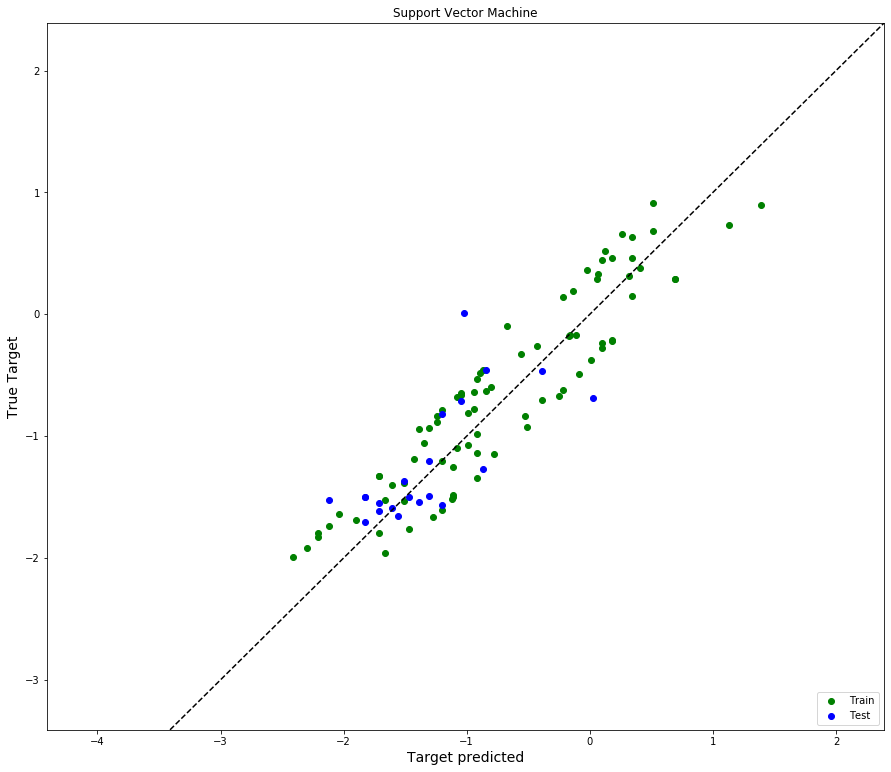

In [173]:
# Support Vector Machine (SVM)
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from random import randint

from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV


# Create SVM object
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svm = svm.SVR(epsilon=0.4, kernel='linear', gamma=1e-4, C=10)

models_acronyme = [svm]
models_name = ["Support Vector Machine"]

fig = plt.figure(figsize=(15, 11))
x_fig = 1
y_fig = 1
nb_fig = x_fig * y_fig
    
fig = plt.figure(figsize=(15, 13))

i = 0
for index_model in models_acronyme:
    # Train the model using the training sets
    result_train = index_model.fit(X_train, y_train)
    y_pred_train = index_model.predict(X_train)
    
    # Print outputs
    print(models_name[i])
    print('\nTRAIN')
    print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
    rmse = sqrt(mean_squared_error(y_train, y_pred_train))
    print('\tRMSE train: %.2f' % rmse)
    
    print('\nCROSS-VALIDATION') 
    # defining parameter range 
    param_grid = {'C': [10],  
                  'epsilon':[0.4],
                  'gamma': [1e-4], 
                  'kernel': ['linear']}  
    scoring = make_scorer(r2_score)
    g_cv = GridSearchCV(svm,
                        param_grid,
                        scoring=scoring, cv=5, refit=True)

    g_cv.fit(X_train, y_train)
    g_cv.best_params_

    result = g_cv.cv_results_
    print('\tQ2 cross-validation: %.2f' % r2_score(y_test, g_cv.best_estimator_.predict(X_test)))
    
    scoring = make_scorer(mean_squared_error)
    g_cv = GridSearchCV(svm,
                        param_grid,
                        scoring=scoring, cv=5, refit=True)

    g_cv.fit(X_train, y_train)
    g_cv.best_params_

    result = g_cv.cv_results_
    print('\tRMSE cross-validation: %.2f' % mean_squared_error(y_test, g_cv.best_estimator_.predict(X_test), squared=False))
    
    
    # Make predictions using the testing set
    y_pred_test = index_model.predict(X_test)

    # Print outputs scores
    # Explained variance score: 1 is perfect prediction
    print('\nTEST')
    # R2 score
    print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
    rmse = sqrt(mean_squared_error(y_test, y_pred_test))
    print('\tRMSE test: %.2f' % rmse)
    
    # Plot outputs
    ax = fig.add_subplot(x_fig,y_fig,i+1)
    ax.scatter(y_train, y_pred_train, c='green', label='Train')
    ax.scatter(y_test, y_pred_test,c='blue',label='Test')
    ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
    plt.xlim((min(y_train)-2,max(y_train)+1))
    plt.ylim((min(y_train)-1,max(y_train)+1))
    plt.title(models_name[i])
    plt.legend(loc='lower right')

    ax.set_ylabel("True Target",fontsize=14)
    ax.set_xlabel("Target predicted",fontsize=14)
        
    i = i + 1

plt.savefig('results_1_1_before_SVM.png')
plt.show()

Random Forest

TRAIN
	R2 train: 0.93
	RMSE train: 0.21

CROSS-VALIDATION
	Q2 cross-validation: 0.48
	RMSE cross-validation: 0.44

TEST
	R2 test: 0.61
	RMSE test: 0.31


<Figure size 1080x936 with 0 Axes>

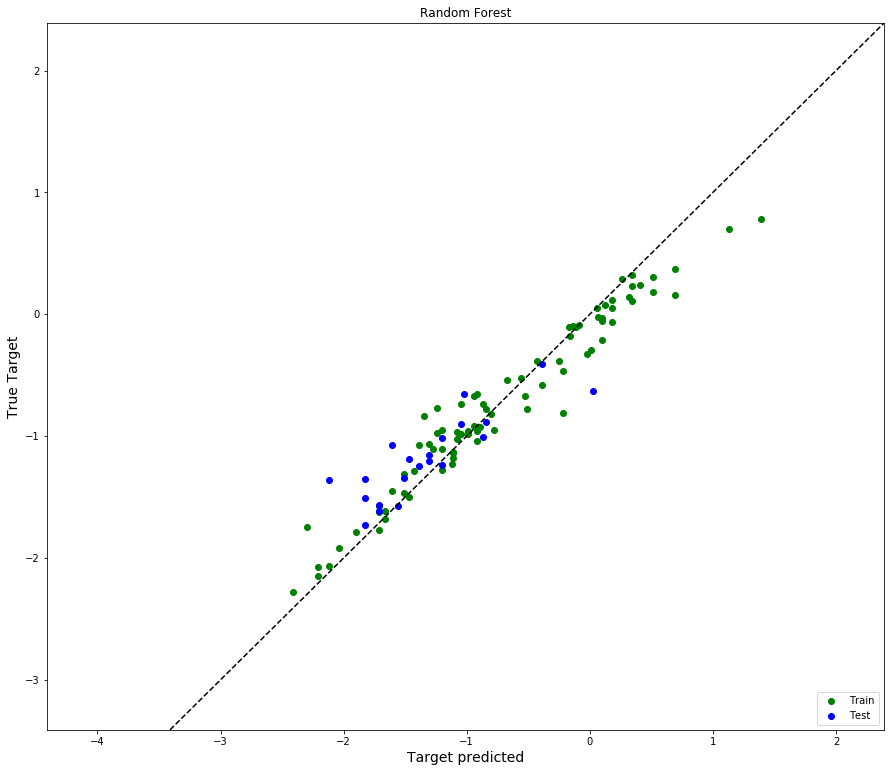

In [192]:
# Random Forest model
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from random import randint

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
# Importing the statistics module 
import statistics 

# Create linear regression object
rf = RandomForestRegressor(n_estimators=1000,max_depth=10,criterion='mae')

models_acronyme = [rf]
models_name = ["Random Forest"]

fig = plt.figure(figsize=(15, 13))
x_fig = 1
y_fig = 1
nb_fig = x_fig * y_fig
    
fig = plt.figure(figsize=(15, 13))

i = 0
for index_model in models_acronyme:
    # Train the model using the training sets
    result_train = index_model.fit(X_train, y_train)
    y_pred_train = index_model.predict(X_train)
    
    # Print outputs
    print(models_name[i])
    print('\nTRAIN')
    print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
    rmse = sqrt(mean_squared_error(y_train, y_pred_train))
    print('\tRMSE train: %.2f' % rmse)
    
    print('\nCROSS-VALIDATION')
    scores = cross_val_score(rf, X_train, y_train, scoring='r2')
    print('\tQ2 cross-validation: %.2f' % statistics.mean(scores))
    scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error')
    print('\tRMSE cross-validation: %.2f' % abs(statistics.mean(scores)))
    
    # Make predictions using the testing set
    y_pred_test = index_model.predict(X_test)

    # Print outputs scores
    # Explained variance score: 1 is perfect prediction
    print('\nTEST')
    # R2 score
    print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
    rmse = sqrt(mean_squared_error(y_test, y_pred_test))
    print('\tRMSE test: %.2f' % rmse)
    
    # Plot outputs
    ax = fig.add_subplot(x_fig,y_fig,i+1)
    ax.scatter(y_train, y_pred_train, c='green', label='Train')
    ax.scatter(y_test, y_pred_test,c='blue',label='Test')
    ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
    plt.xlim((min(y_train)-2,max(y_train)+1))
    plt.ylim((min(y_train)-1,max(y_train)+1))
    plt.title(models_name[i])
    plt.legend(loc='lower right')

    ax.set_ylabel("True Target",fontsize=14)
    ax.set_xlabel("Target predicted",fontsize=14)
        
    i = i + 1

plt.savefig('results_1_1_before_RF.png')
plt.show()

Partial Least Square

TRAIN
	R2 train: 0.94
	RMSE train: 0.20

CROSS-VALIDATION
	Q2 cross-validation: 0.48
	RMSE cross-validation: 0.44

TEST
	R2 test: 0.47
	RMSE test: 0.36


<Figure size 1080x936 with 0 Axes>

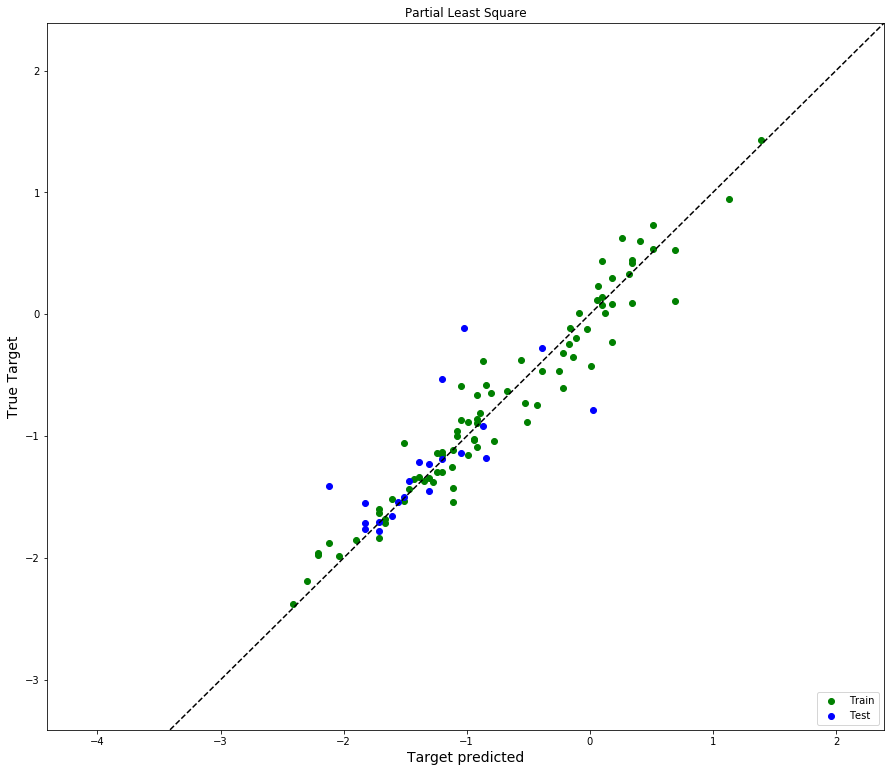

In [193]:
# Partial Least Square model
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from random import randint

from sklearn.cross_decomposition import PLSCanonical
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


# Create linear regression object
pls2 = PLSRegression(n_components=21)  
#pls2 = PLSCanonical(n_components=10,algorithm='nipals')  

models_acronyme = [pls2]
models_name = ["Partial Least Square"]

fig = plt.figure(figsize=(15, 13))
x_fig = 1
y_fig = 1
nb_fig = x_fig * y_fig
    
fig = plt.figure(figsize=(15, 13))

i = 0
for index_model in models_acronyme:
    # Train the model using the training sets
    result_train = index_model.fit(X_train, y_train)
    y_pred_train = index_model.predict(X_train)
    
    # Print outputs
    print(models_name[i])
    print('\nTRAIN')
    print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
    rmse = sqrt(mean_squared_error(y_train, y_pred_train))
    print('\tRMSE train: %.2f' % rmse)
    
    print('\nCROSS-VALIDATION')
    scores = cross_val_score(rf, X_train, y_train, scoring='r2')
    print('\tQ2 cross-validation: %.2f' % statistics.mean(scores))
    scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error')
    print('\tRMSE cross-validation: %.2f' % abs(statistics.mean(scores)))
    
    # Make predictions using the testing set
    y_pred_test = index_model.predict(X_test)

    # Print outputs scores
    # Explained variance score: 1 is perfect prediction
    print('\nTEST')
    # R2 score
    print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
    rmse = sqrt(mean_squared_error(y_test, y_pred_test))
    print('\tRMSE test: %.2f' % rmse)
    
    # Plot outputs
    ax = fig.add_subplot(x_fig,y_fig,i+1)
    ax.scatter(y_train, y_pred_train, c='green', label='Train')
    ax.scatter(y_test, y_pred_test,c='blue',label='Test')
    ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
    plt.xlim((min(y_train)-2,max(y_train)+1))
    plt.ylim((min(y_train)-1,max(y_train)+1))
    plt.title(models_name[i])
    plt.legend(loc='lower right')

    ax.set_ylabel("True Target",fontsize=14)
    ax.set_xlabel("Target predicted",fontsize=14)
        
    i = i + 1

plt.savefig('results_1_1_before_PLS.png')
plt.show()

Decision tree regressor

TRAIN
	R2 train: 1.00
	RMSE train: 0.00

CROSS-VALIDATION
	Q2 cross-validation: 0.51
	RMSE cross-validation: 0.32

TEST
	R2 test: 0.70
	RMSE test: 0.27


<Figure size 1080x792 with 0 Axes>

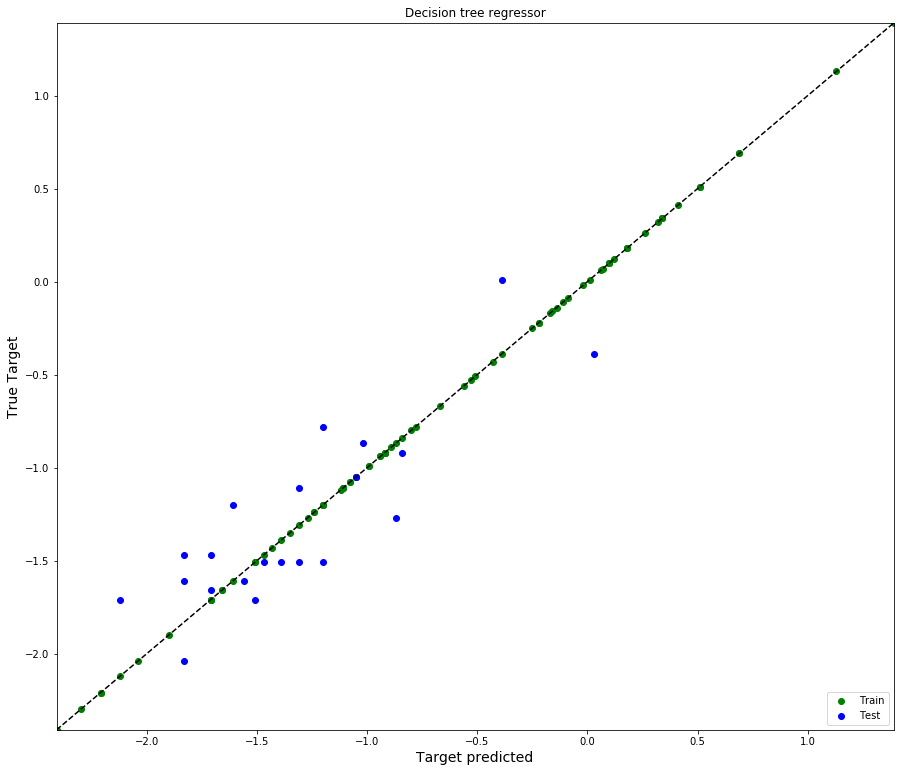

In [221]:
# decision tree regressor
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from random import randint

from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


# Create knn object
dt = DecisionTreeRegressor(random_state=1, max_depth=11)

models_acronyme = [dt]
models_name = ["Decision tree regressor"]

fig = plt.figure(figsize=(15, 11))
x_fig = 1
y_fig = 1
nb_fig = x_fig * y_fig
    
fig = plt.figure(figsize=(15, 13))

i = 0
for index_model in models_acronyme:
    # Train the model using the training sets
    result_train = index_model.fit(X_train, y_train)
    y_pred_train = index_model.predict(X_train)
    
    # Print outputs
    print(models_name[i])
    print('\nTRAIN')
    print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
    rmse = sqrt(mean_squared_error(y_train, y_pred_train))
    print('\tRMSE train: %.2f' % rmse)
    
    print('\nCROSS-VALIDATION')    
    scoring = make_scorer(r2_score)
    g_cv = GridSearchCV(dt,
            param_grid={'min_samples_split': range(2, 10)},
            scoring=scoring, cv=5, refit=True)

    g_cv.fit(X_train, y_train)
    g_cv.best_params_

    result = g_cv.cv_results_
    print('\tQ2 cross-validation: %.2f' % r2_score(y_test, g_cv.best_estimator_.predict(X_test)))
    
    scoring = make_scorer(mean_squared_error)
    g_cv = GridSearchCV(dt,
            param_grid={'min_samples_split': range(2, 10)},
            scoring=scoring, cv=5, refit=True)

    g_cv.fit(X_train, y_train)
    g_cv.best_params_

    result = g_cv.cv_results_
    print('\tRMSE cross-validation: %.2f' % mean_squared_error(y_test, g_cv.best_estimator_.predict(X_test), squared=False))
    
    # Make predictions using the testing set
    y_pred_test = index_model.predict(X_test)

    # Print outputs scores
    # Explained variance score: 1 is perfect prediction
    print('\nTEST')
    # R2 score
    print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
    rmse = sqrt(mean_squared_error(y_test, y_pred_test))
    print('\tRMSE test: %.2f' % rmse)
    
    # Plot outputs
    ax = fig.add_subplot(x_fig,y_fig,i+1)
    ax.scatter(y_train, y_pred_train, c='green', label='Train')
    ax.scatter(y_test, y_pred_test,c='blue',label='Test')
    ax.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], '--k',c='black')
    plt.xlim((min(y_train),max(y_train)))
    plt.ylim((min(y_train),max(y_train)))
    plt.title(models_name[i])
    plt.legend(loc='lower right')

    ax.set_ylabel("True Target",fontsize=14)
    ax.set_xlabel("Target predicted",fontsize=14)
        
    i = i + 1

plt.savefig('results_1_1_before_DTR.png')
plt.show()